In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [61]:
data = pd.read_csv('train.csv', sep=",")

In [62]:
data.shape

(891, 12)

In [63]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [64]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 891


In [67]:
data.drop(columns = 'Cabin', axis = 1, inplace = True)

In [68]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Age. Тип данных float64. Количество пустых значений 177, 19.87%.


In [69]:
data_num = data[num_cols]
data_num

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


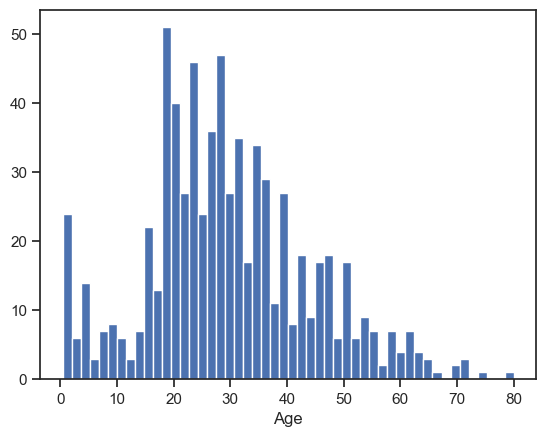

In [70]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [71]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [72]:
data_num_Age = data_num[['Age']]
data_num_Age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [73]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Age)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [74]:
strategies=['mean', 'median', 'most_frequent']

In [75]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Age)
    return data_num_imp[mask_missing_values_only]

In [76]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911765, 29.69911765, 29.69911765,
        29.69911765, 29.69911765, 29.69911

In [77]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

/var/folders/f5/r0gs37h504ggbth56zsr1c5c0000gn/T/ipykernel_30746/2889979798.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace = True)


In [78]:
data.dropna(inplace = True)

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [81]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['Sex'])

In [82]:
le.classes_

array(['female', 'male'], dtype=object)

In [83]:
cat_enc_le

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [84]:
le.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [85]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [86]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Fare']])

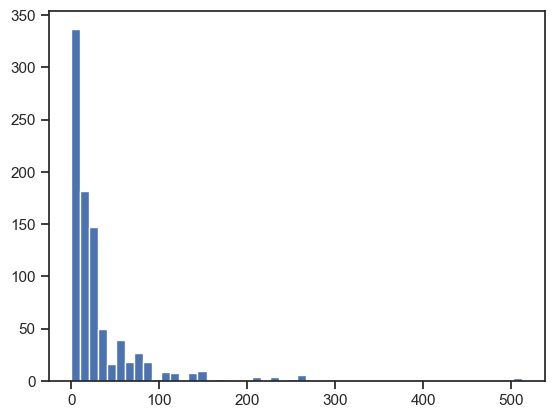

In [87]:
plt.hist(data['Fare'], 50)
plt.show()

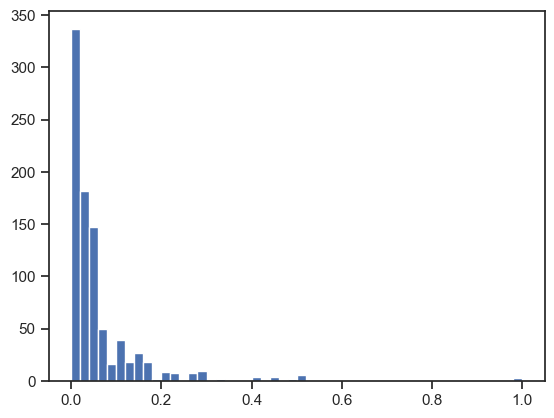

In [88]:
plt.hist(sc1_data, 50)
plt.show()
